In [5]:
import json
import matplotlib.pyplot as plt
from rolling_avg import rolling_avg
n_avg = 100

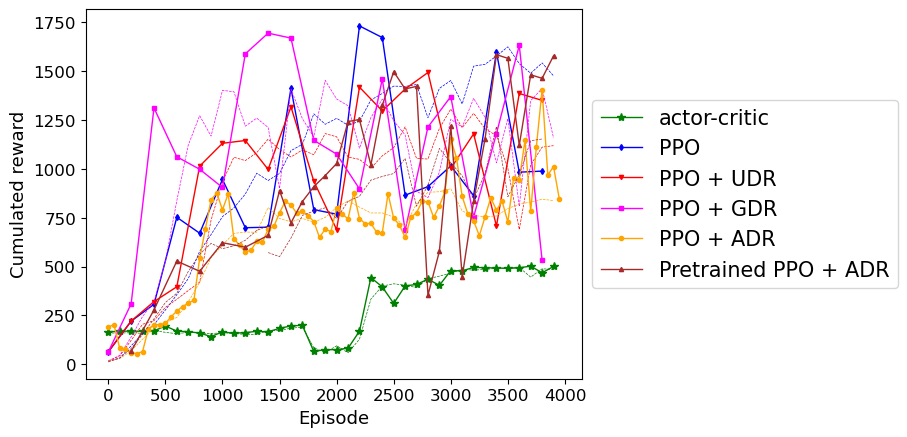

In [66]:
# AC:
fig, ax = plt.subplots(1,1)
path = f"outputs/compare/step_14_train_and_test/"

with open(path + "rewards.json", 'r') as f:
    train_rewards = json.load(f)[6000:]
with open(path + "test_reward.json", 'r') as f:
    test_rewards = json.load(f)[60:]
N_eps = len(train_rewards)
test_every = 100
train_rewards = rolling_avg(train_rewards, n_avg)
train_eps = range(0, N_eps, n_avg)
test_eps = range(0, len(test_rewards)*test_every, test_every)
ax.plot(train_eps, train_rewards, linewidth=0.5, linestyle='--', c='green')
ax.plot(test_eps, test_rewards, linewidth=1, marker='*', label='actor-critic', c='green')

# PPO only

path = f"outputs/ppo-basic/step_1_train/"

with open(path + "train_rewards.json", 'r') as f:
    train_rewards = json.load(f)
with open(path + "test_rewards.json", 'r') as f:
    test_rewards = json.load(f)
N_eps = len(train_rewards)
test_every = 200
train_rewards = rolling_avg(train_rewards, n_avg)
train_eps = range(0, N_eps, n_avg)
test_eps = range(0, len(test_rewards)*test_every, test_every)
ax.plot(train_eps, train_rewards, linewidth=0.5, linestyle='--', c='blue')
ax.plot(test_eps, test_rewards, linewidth=1, marker='d', label='PPO', c='blue', markersize=3)

# PPO + UDR

path = f"outputs/ppo-udr/step_4_train/"

with open(path + "train_rewards.json", 'r') as f:
    train_rewards = json.load(f)
with open(path + "test_rewards.json", 'r') as f:
    test_rewards = json.load(f)
N_eps = len(train_rewards)
test_every = 200
train_rewards = rolling_avg(train_rewards, n_avg)
train_eps = range(0, N_eps, n_avg)
test_eps = range(0, len(test_rewards)*test_every, test_every)
ax.plot(train_eps, train_rewards, linewidth=0.5, linestyle='--', c='red')
ax.plot(test_eps, test_rewards, linewidth=1, marker='v', label='PPO + UDR', c='red', markersize=3)

# PPO + GDR

path = f"outputs/ppo-gdr/step_2_train/"

with open(path + "train_rewards.json", 'r') as f:
    train_rewards = json.load(f)
with open(path + "test_rewards.json", 'r') as f:
    test_rewards = json.load(f)
N_eps = len(train_rewards)
test_every = 200
train_rewards = rolling_avg(train_rewards, n_avg)
train_eps = range(0, N_eps, n_avg)
test_eps = range(0, len(test_rewards)*test_every, test_every)
ax.plot(train_eps, train_rewards, linewidth=0.5, linestyle='--', c='magenta')
ax.plot(test_eps, test_rewards, linewidth=1, marker='s', label='PPO + GDR', c='magenta', markersize=3)

# PPO + ADR

dir = "outputs/ppo-adr/step_1_train/"
with open(dir + 'rd_rewards.json') as f:
    rd_rewards = json.load(f)[:4000]
averaged_rewards = rolling_avg(rd_rewards, n_avg)
test_every = 10
n_test_avg = 5
with open(dir + 'ref_rewards.json') as f:
    ref_rewards = json.load(f)[:400]
ref_rewards = rolling_avg(ref_rewards, n_test_avg)
train_eps = range(0, len(rd_rewards), n_avg)
test_eps = range(0, len(ref_rewards)*test_every*n_test_avg, test_every*n_test_avg)
ax.plot(train_eps, averaged_rewards, linewidth=0.5, linestyle='--', c='orange')
ax.plot(test_eps, ref_rewards, linewidth=1, marker='o', label='PPO + ADR', c='orange', markersize=3)

# pretrained PPO + ADR

dir = "outputs/ppo-adr-pretrained/step_6_train/"
with open(dir + 'train_rewards.json') as f:
    rewards = json.load(f)
averaged_rewards = rolling_avg(rewards, n_avg)
ax.plot(range(0, len(averaged_rewards)*n_avg, n_avg), averaged_rewards, linewidth=0.5, linestyle='--', c='brown')
with open(dir + 'test_rewards.json') as f:
    rewards = json.load(f)
ax.plot(range(200, len(averaged_rewards)*n_avg, 200), rewards, linewidth=1, marker='^', label='Pretrained PPO + ADR', c='brown', markersize=3)

last_ep = range(0, len(averaged_rewards)*n_avg, n_avg)[-1]
last_value = rewards[-1]

dir = "outputs/ppo-adr-pretrained/step_7_train/"
with open(dir + 'rd_rewards.json') as f:
    rd_rewards = json.load(f)[:2500]
averaged_rewards = rolling_avg(rd_rewards, n_avg)

with open(dir + 'ref_rewards.json') as f:
    ref_rewards = json.load(f)[:250]
n_test_avg=10
averaged_ref_rewards = rolling_avg(ref_rewards, n_test_avg)
ax.plot(range(last_ep + 100, len(averaged_ref_rewards)*10*n_test_avg + last_ep + 100, 10*n_test_avg), averaged_ref_rewards, linewidth=1, marker='^', c='brown', markersize=3)
ax.plot(range(last_ep, len(averaged_rewards)*n_avg + last_ep, n_avg), averaged_rewards, linewidth=0.5, linestyle='--', c='brown')
ax.plot([last_ep, last_ep+100], [last_value, averaged_ref_rewards[0]], linewidth=1, c='brown')

ax.set_xlabel("Episode", fontsize=13)
ax.set_ylabel("Cumulated reward", fontsize=13)
ax.tick_params(axis='both', labelsize=12)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=15)

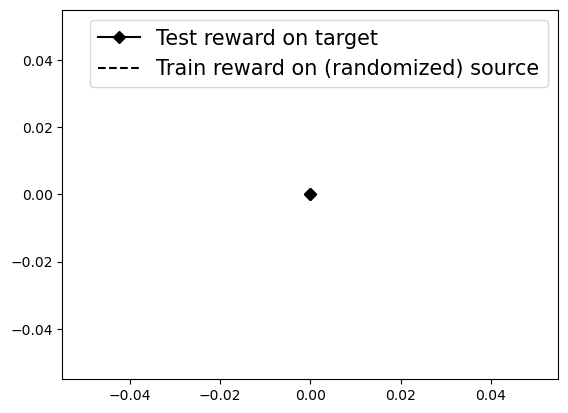

In [67]:
fig, ax = plt.subplots(1,1)
ax.plot([0,0], [0,0], c='black', marker='D', label='Test reward on target')
ax.plot([0,0], [0,0], c='black', linestyle='--', label='Train reward on (randomized) source')
ax.legend(fontsize=15)